In [1]:
import pandas as pd
import numpy as np
import json
import glob
import matplotlib.pyplot as plt
import matplotlib


#%pylab inline --no-import-all

def payloads_from_json_log_single(filename):
    with open(filename, 'r') as f:
        for line in f:
            obj = json.loads(line)
            yield {
                "device_id": obj["end_device_ids"]["device_id"],
                "received_at": obj["received_at"],
                "gateway_id": [m["gateway_ids"]["gateway_id"] for m in obj["uplink_message"]["rx_metadata"]],
                **obj["uplink_message"].get("decoded_payload", {})
            } 
            
            

def payloads_from_json_log(fname_pattern):
    for fname in glob.glob(fname_pattern):
        yield from payloads_from_json_log_single(fname)

In [2]:
df = pd.DataFrame(payloads_from_json_log("/storage/stations/GEODOS/*.json"))
df["received_at"] = pd.to_datetime(df["received_at"])


In [4]:
df

,device_id,received_at,gateway_id,V,hits,mA,°C,Lat,Lon
0,geodos13,2021-12-05 12:55:46.897603881+00:00,[crreat2],3.90,1872.0,-16.0,19.0,NaN,NaN
1,geodos13,2021-12-06 08:20:22.389847423+00:00,[crreat2],3.79,1766.0,-17.0,19.0,NaN,NaN
2,geodos13,2021-12-06 08:37:26.295514500+00:00,[crreat2],3.78,1822.0,-16.0,19.0,NaN,NaN
3,geodos13,2021-12-06 08:54:24.583468074+00:00,[crreat2],3.78,1792.0,-17.0,19.0,NaN,NaN
4,geodos13,2021-12-06 09:11:24.481038758+00:00,[crreat2],3.78,1826.0,-17.0,19.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5035,geodosb2,2022-02-10 18:00:20.991951175+00:00,[crreat2],3.50,0.0,-70.0,6.0,NaN,NaN
5036,geodosb2,2022-02-10 18:00:54.274100819+00:00,[crreat2],NaN,NaN,NaN,NaN,49.2605,14.6922
5037,geodosb2,2022-02-10 18:01:31.087486119+00:00,[crreat2],3.51,0.0,-89.0,6.0,NaN,NaN
5038,geodosb2,2022-02-10 18:02:06.993386270+00:00,[crreat2],3.50,0.0,-72.0,6.0,NaN,NaN


TypeError: no numeric data to plot

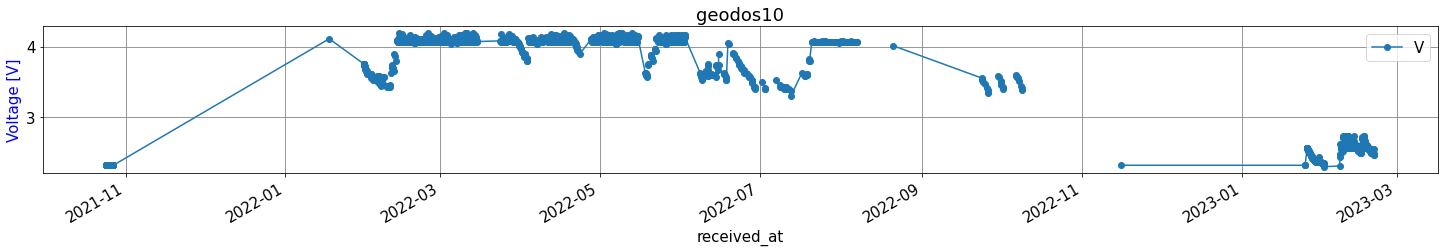

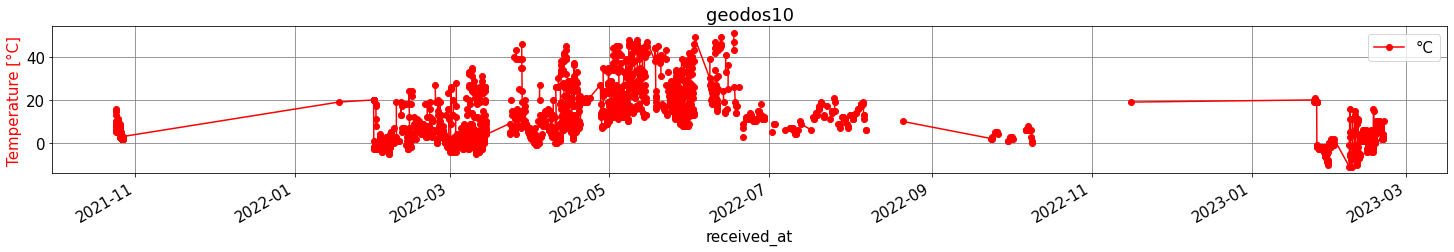

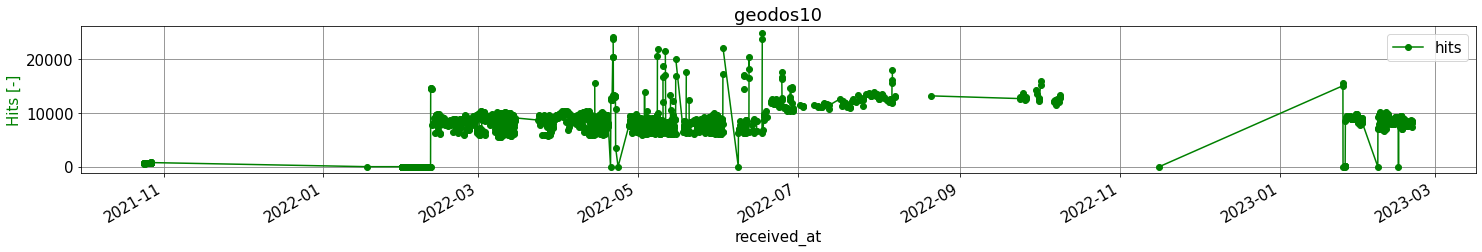

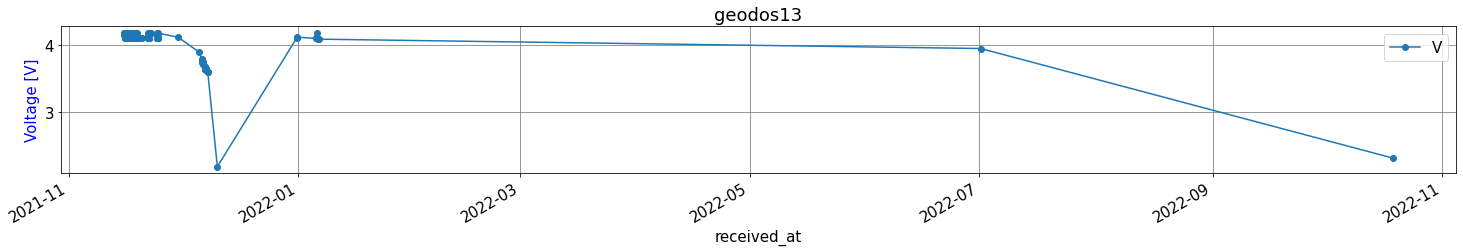

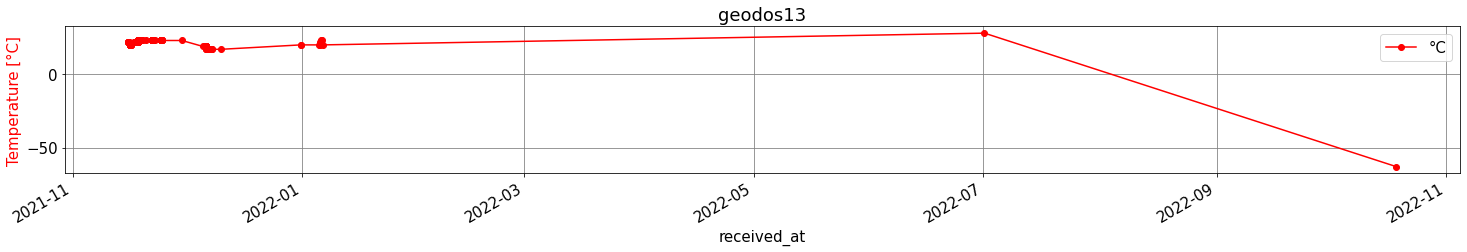

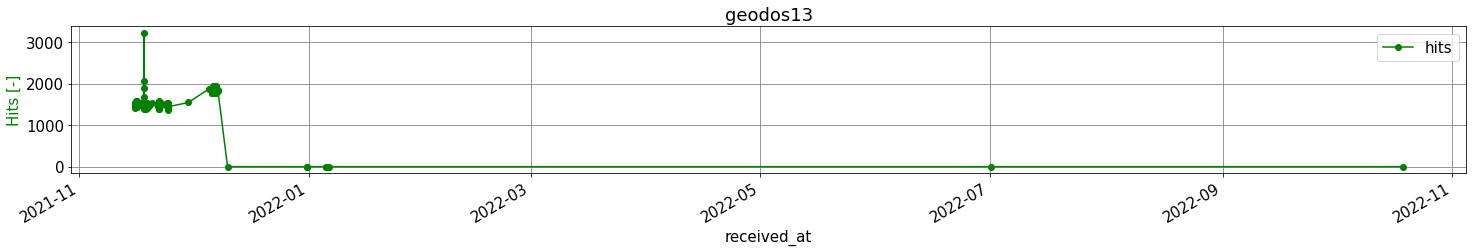

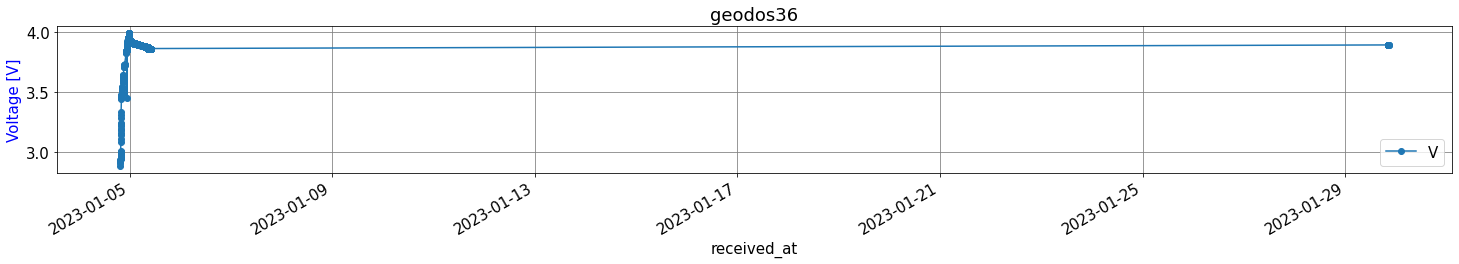

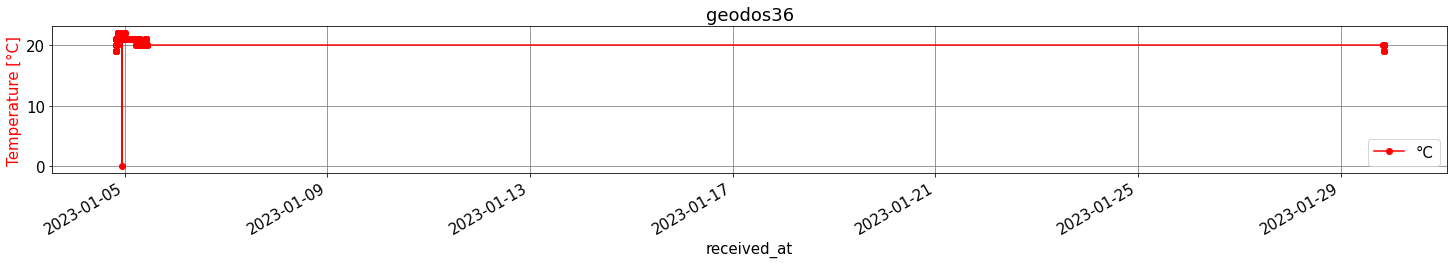

In [6]:
#plt.figure(figsize=(10,1))
#plt.tight_layout()
matplotlib.rcParams.update({'font.size': 15})

# iterate over unique device IDs seen in logged messages
for dev_id in np.unique(df["device_id"]):
    # select rows from that particular device
    df_filtered = df[df["device_id"] == dev_id]
    
    # some plots...
    df_filtered.plot("received_at", "V", figsize=(25, 3), title=dev_id, marker='o')
    plt.ylabel('Voltage [V]', color='blue')
    plt.grid(visible=True, which='major', color='grey', linestyle='-')
    df_filtered.plot("received_at", "°C", figsize=(25, 3), title=dev_id, color='red', marker='o')
    plt.ylabel('Temperature [°C]', color='red')
    plt.grid(visible=True, which='major', color='grey', linestyle='-')
    df_filtered.plot("received_at", "hits", figsize=(25, 3), title=dev_id, color='green', marker='o')
    plt.ylabel('Hits [-]', color='green')
    plt.grid(visible=True, which='major', color='grey', linestyle='-')



(19702.0, 19704.0)

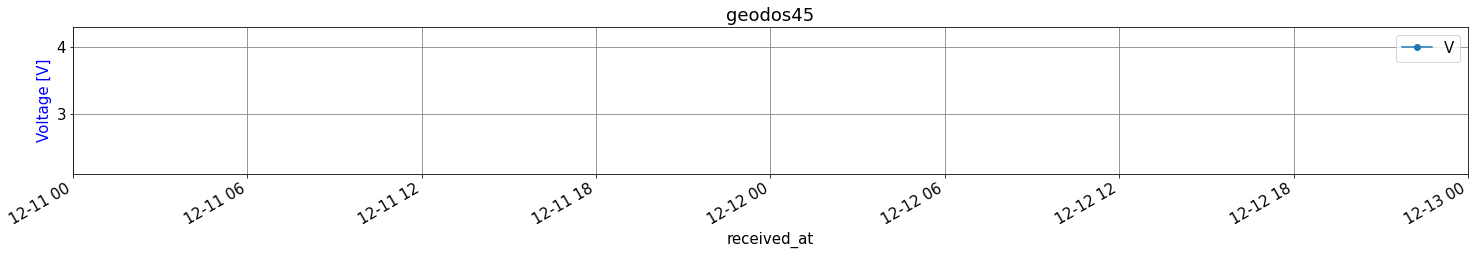

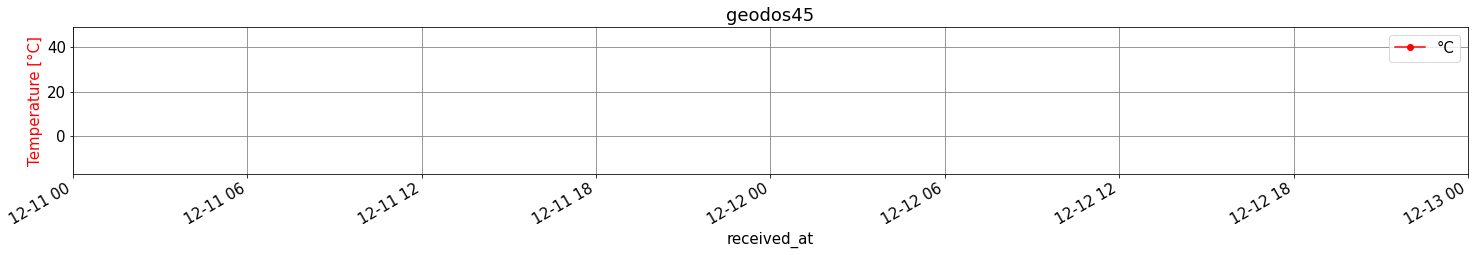

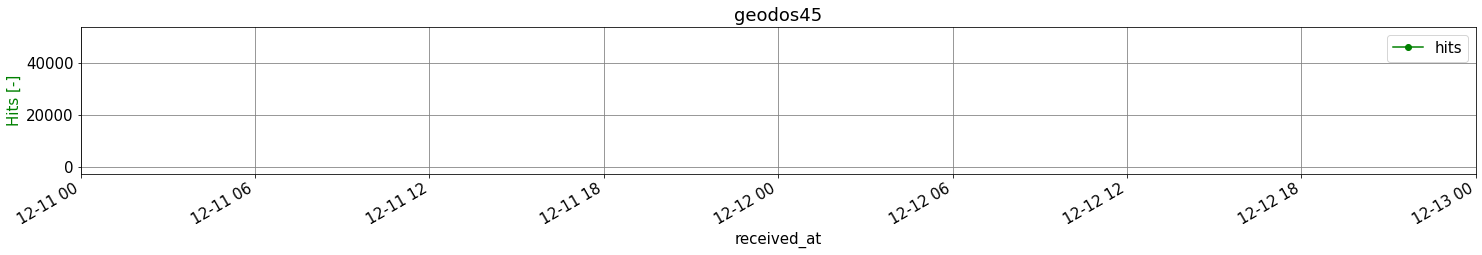

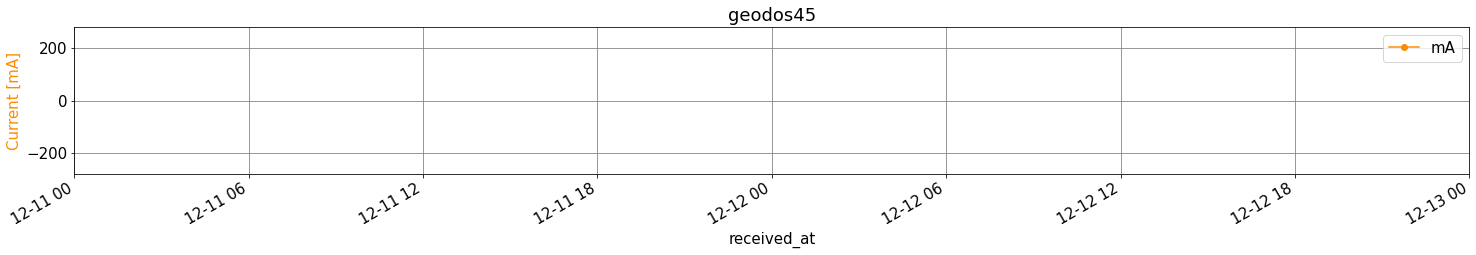

In [15]:
DEVID = 'geodosec'
#DEVID = 'geodos70'
#DEVID = 'geodos86'
DEVID = 'geodosdd'
DEVID = 'geodos45'

FROM = '2023-12-11'
TO = '2023-12-13'

df = pd.DataFrame(payloads_from_json_log("/storage/stations/GEODOS/*.json"))
df["received_at"] = pd.to_datetime(df["received_at"])


#plt.figure(figsize=(10,1))
#plt.tight_layout()
matplotlib.rcParams.update({'font.size': 15})

df_filtered = df[df["device_id"] == DEVID]

# some plots...
df_filtered.plot("received_at", "V", figsize=(25, 3), title=DEVID, marker='o')
plt.ylabel('Voltage [V]', color='blue')
plt.grid(visible=True, which='major', color='grey', linestyle='-')
plt.xlim(FROM,TO)
df_filtered.plot("received_at", "°C", figsize=(25, 3), title=DEVID, color='red', marker='o')
plt.ylabel('Temperature [°C]', color='red')
plt.grid(visible=True, which='major', color='grey', linestyle='-')
plt.xlim(FROM,TO)
df_filtered.plot("received_at", "hits", figsize=(25, 3), title=DEVID, color='green', marker='o')
plt.ylabel('Hits [-]', color='green')
plt.grid(visible=True, which='major', color='grey', linestyle='-')
plt.xlim(FROM,TO)
df_filtered.plot("received_at", "mA", figsize=(25, 3), title=DEVID, color='darkorange', marker='o')
plt.ylabel('Current [mA]', color='darkorange')
plt.grid(visible=True, which='major', color='grey', linestyle='-')
plt.xlim(FROM,TO)


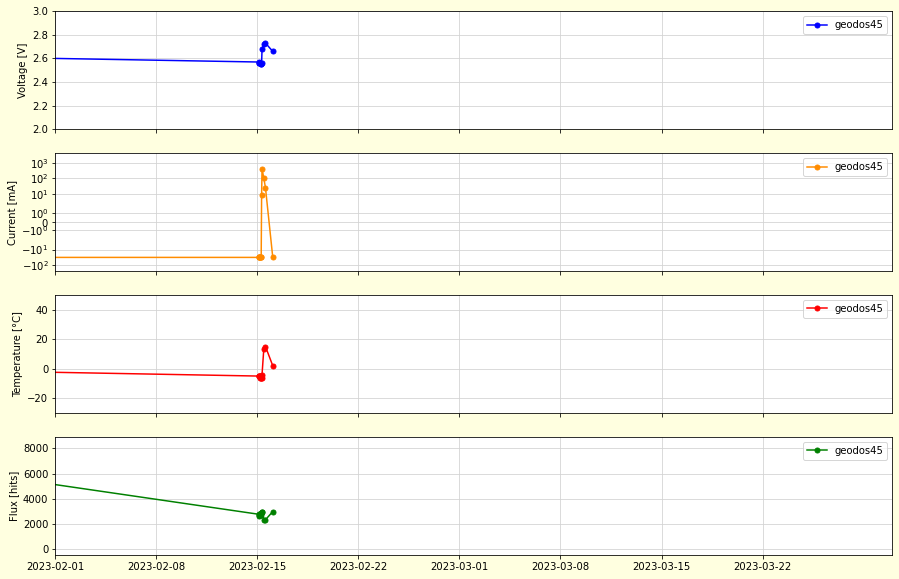

In [8]:
DEVID = 'geodos45'
#DEVID = 'geodos86'
#DEVID = 'geodos10'

FROM = '2022-12-12'
FROM = '2023-2-1'
TO = '2023-3-31'
#TO = '2022-12-31'

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, sharex=True, figsize=(15,10), facecolor='lightyellow')
#matplotlib.rcParams.update({'font.size': 15})

df = pd.DataFrame(payloads_from_json_log("/storage/stations/GEODOS/2023*.json"))
df["received_at"] = pd.to_datetime(df["received_at"])

df_filtered = df[df["device_id"] == DEVID].copy()
df_filtered.set_index("received_at", inplace=True, drop=False)
df_filtered.sort_index(inplace=True)

ax1.plot( df_filtered["V"], label=DEVID, marker='o', ms = 5, color='blue')
ax1.set_ylabel('Voltage [V]')
ax1.grid(visible=True, color='lightgrey', linestyle='-')
ax1.set_xlim(pd.to_datetime(FROM),pd.to_datetime(TO))
ax1.set_ylim(2.0,3.0)
ax1.legend()

ax2.plot( df_filtered["mA"]*8, label=DEVID, marker='o', ms = 5, color='darkorange')
ax2.set_ylabel('Current [mA]')
ax2.grid(visible=True, color='lightgrey', linestyle='-')
#ax2.set_ylim(-100,+1800)
ax2.set_yscale('symlog')
ax2.legend()

ax3.plot( df_filtered["°C"], label=DEVID, marker='o', ms = 5, color='red')
ax3.set_ylabel('Temperature [°C]')
ax3.grid(visible=True, color='lightgrey', linestyle='-')
ax3.set_ylim(-30,+50)
ax3.legend()

ax4.plot( df_filtered["hits"], label=DEVID, marker='o', ms = 5, color='green')
ax4.set_ylabel('Flux [hits]')
ax4.grid(visible=True, color='lightgrey', linestyle='-')
#ax4.set_ylim(000,1000)
ax4.legend()


In [22]:
df_filtered.loc[df_filtered.V == 2.62]
df_filtered

,device_id,received_at,gateway_id,Lat,Latitude,Lon,Longitude,Source,V,hits,mA,°C
received_at,,,,,,,,,,,,
2023-01-24 21:06:41.287520254+00:00,geodos10,2023-01-24 21:06:41.287520254+00:00,[crreat2],NaN,NaN,NaN,NaN,NaN,2.31,15066,255.0,20.0
2023-01-24 23:55:38.676450302+00:00,geodos10,2023-01-24 23:55:38.676450302+00:00,[crreat2],NaN,NaN,NaN,NaN,NaN,2.31,15593,255.0,19.0
2023-01-25 00:55:47.533796013+00:00,geodos10,2023-01-25 00:55:47.533796013+00:00,[crreat2],NaN,NaN,NaN,NaN,NaN,2.31,0,-33.0,21.0
2023-01-25 20:14:16.131482689+00:00,geodos10,2023-01-25 20:14:16.131482689+00:00,[crreat2],NaN,NaN,NaN,NaN,NaN,2.55,45,-5.0,19.0
2023-01-25 20:14:40.988351242+00:00,geodos10,2023-01-25 20:14:40.988351242+00:00,[crreat2],NaN,NaN,NaN,NaN,NaN,2.55,39,-5.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-01 08:06:00.204579010+00:00,geodos10,2023-02-01 08:06:00.204579010+00:00,[crreat2],NaN,NaN,NaN,NaN,NaN,2.32,8545,-6.0,0.0
2023-02-01 08:48:54.790324467+00:00,geodos10,2023-02-01 08:48:54.790324467+00:00,[crreat2],NaN,NaN,NaN,NaN,NaN,2.31,8364,-6.0,0.0
2023-02-01 10:14:55.135825094+00:00,geodos10,2023-02-01 10:14:55.135825094+00:00,[crreat2],NaN,NaN,NaN,NaN,NaN,2.29,8139,-6.0,2.0


In [14]:
df[-10:]

,device_id,received_at,gateway_id,V,hits,mA,°C,Lat,Lon,Latitude,Longitude,Source
57894,geodos45,2022-12-31 22:51:16.055936161+00:00,[crreat2],2.43,240.0,-4.0,18.0,NaN,NaN,NaN,NaN,NaN
57895,geodos45,2022-12-31 22:51:58.618415265+00:00,[crreat2],2.43,254.0,-4.0,18.0,NaN,NaN,NaN,NaN,NaN
57896,geodos45,2022-12-31 22:53:23.720261962+00:00,[crreat2],2.43,269.0,-4.0,18.0,NaN,NaN,NaN,NaN,NaN
57897,geodos45,2022-12-31 22:54:48.857243478+00:00,[crreat2],2.43,292.0,-4.0,18.0,NaN,NaN,NaN,NaN,NaN
57898,geodos45,2022-12-31 22:55:31.443853507+00:00,[crreat2],2.43,255.0,-4.0,18.0,NaN,NaN,NaN,NaN,NaN
57899,geodos45,2022-12-31 22:56:14.071149985+00:00,[crreat2],2.43,255.0,-4.0,18.0,NaN,NaN,NaN,NaN,NaN
57900,geodos45,2022-12-31 22:57:39.193448487+00:00,[crreat2],2.43,270.0,-4.0,18.0,NaN,NaN,NaN,NaN,NaN
57901,geodos45,2022-12-31 22:58:21.744701252+00:00,[crreat2],2.43,238.0,-4.0,18.0,NaN,NaN,NaN,NaN,NaN
57902,geodos86,2022-12-31 22:58:42.322748130+00:00,[crreat2],2.57,5898.0,-5.0,6.0,NaN,NaN,NaN,NaN,NaN
57903,geodos45,2022-12-31 22:59:35.515979045+00:00,[crreat2],NaN,NaN,NaN,NaN,49.2604,14.692,49.2604,14.692,GPS
